In [1]:
import pandas as pd
import torch

In [2]:
df = pd.read_csv('추자도.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22184,2014-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.9,NaN,4.3
1,22184,2014-01-16,4.2,1029.6,60.0,4.4,14.6,1.0,0.6,0.9,1.4,3.3,4.3
2,22184,2014-01-17,3.7,1026.9,59.0,6.1,14.8,0.7,0.4,0.7,1.1,3.3,9.1
3,22184,2014-01-18,8.8,1028.5,66.0,5.8,14.9,2.8,1.8,2.7,4.2,5.3,7.1
4,22184,2014-01-19,3.8,1029.1,66.0,4.6,14.8,1.6,1.0,2.0,3.4,5.6,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,22184,2022-12-27,6.8,1028.8,63.0,5.6,16.1,1.3,0.8,1.0,1.5,3.7,4.6
3077,22184,2022-12-28,7.2,1030.4,59.0,5.6,16.0,1.6,1.0,1.3,2.3,4.5,5.8
3078,22184,2022-12-29,6.5,1032.6,59.0,4.9,16.1,1.5,0.9,1.1,1.9,4.7,6.4
3079,22184,2022-12-30,6.9,1032.3,53.0,5.8,16.2,1.5,0.9,1.2,2.0,4.3,4.9


In [3]:
df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)']] # Column 재정리
df

,Apress(hPa),Atemp(°C),Stemp(°C)
date,,,
2014-01-15,NaN,NaN,NaN
2014-01-16,1029.6,4.4,14.6
2014-01-17,1026.9,6.1,14.8
2014-01-18,1028.5,5.8,14.9
2014-01-19,1029.1,4.6,14.8
...,...,...,...
2022-12-27,1028.8,5.6,16.1
2022-12-28,1030.4,5.6,16.0
2022-12-29,1032.6,4.9,16.1


In [4]:
import numpy as np


df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan

df.loc[df['Atemp(°C)'] == 0, 'Atemp(°C)'] = np.nan

df = df.dropna()
df

,Apress(hPa),Atemp(°C),Stemp(°C)
date,,,
2014-01-16,1029.6,4.4,14.6
2014-01-17,1026.9,6.1,14.8
2014-01-18,1028.5,5.8,14.9
2014-01-19,1029.1,4.6,14.8
2014-01-20,1022.0,7.6,14.6
...,...,...,...
2022-12-27,1028.8,5.6,16.1
2022-12-28,1030.4,5.6,16.0
2022-12-29,1032.6,4.9,16.1


In [5]:
correlation = df['Atemp(°C)'].corr(df['Stemp(°C)'])
print("Correlation between average temperature and average water temperature:", correlation)

Correlation between average temperature and average water temperature: 0.8768819936511022


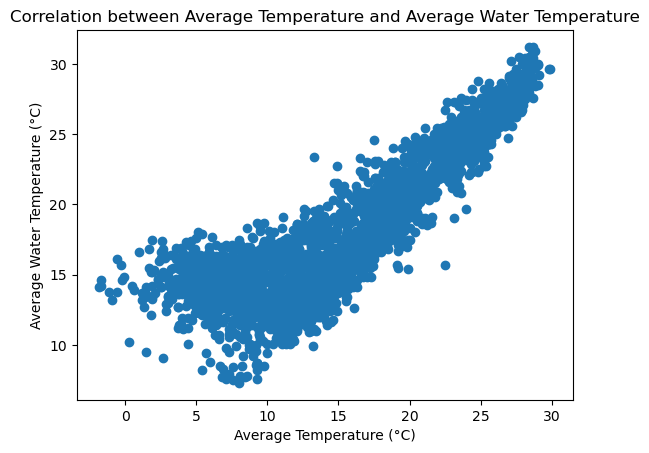

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['Atemp(°C)'], df['Stemp(°C)'])
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Water Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature')
plt.show()

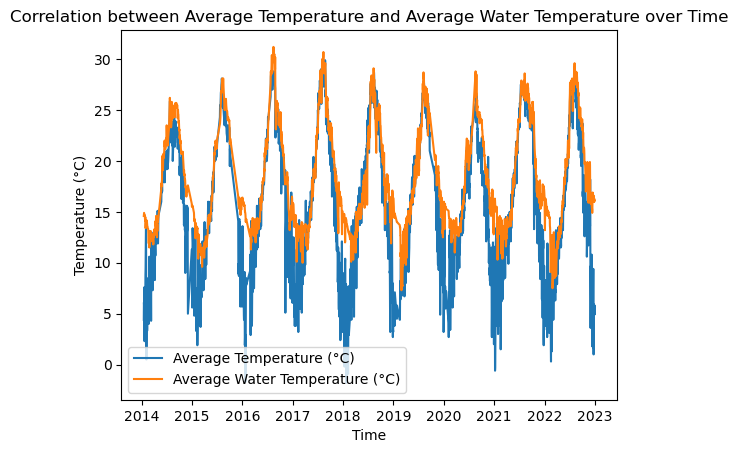

In [7]:
plt.plot(df['Atemp(°C)'], label='Average Temperature (°C)')
plt.plot(df['Stemp(°C)'], label='Average Water Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature over Time')
plt.legend()
plt.show()

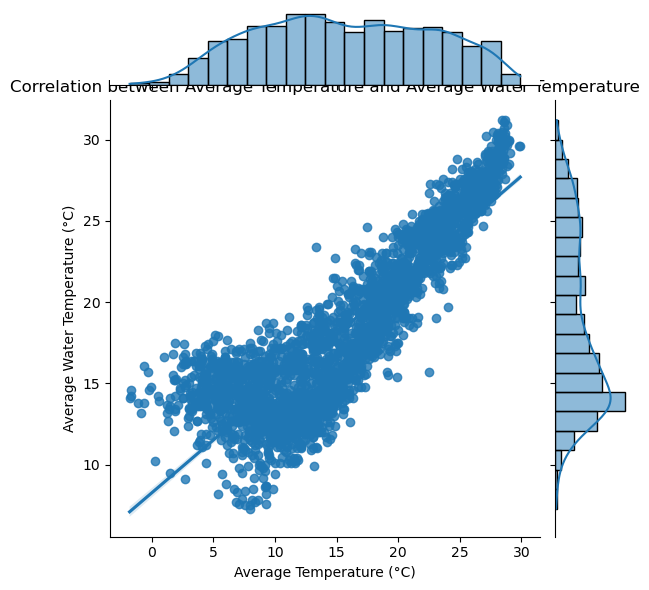

In [8]:
import seaborn as sns

sns.jointplot(x=df['Atemp(°C)'], y=df['Stemp(°C)'], kind='reg')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Water Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature')
plt.show()

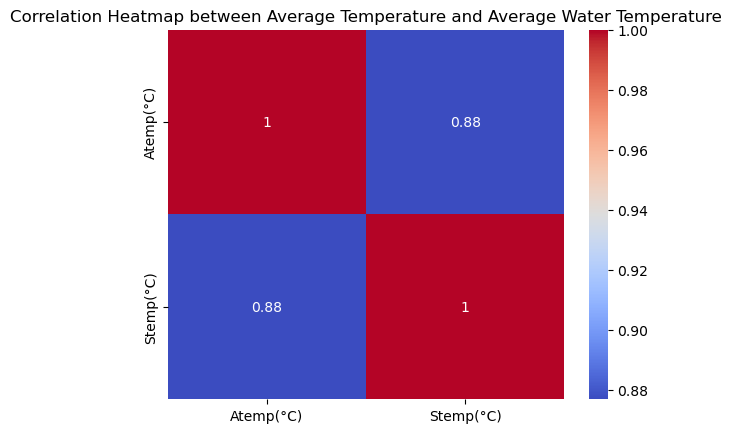

In [9]:
correlation_matrix = df[['Atemp(°C)', 'Stemp(°C)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Average Temperature and Average Water Temperature')
plt.show()